In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from time import process_time

In [ ]:
samp = np.random.gamma(10,5,size=10000)
m = np.mean(samp)
m

In [ ]:
samp = np.random.gamma(10,5,size=10000)


0.16666666666666666
0.0010070000000723667
138.99200599999995
278.10682999999995
417.138903
556.0290210000001
694.9949979999999
834.0190229999998
973.1452559999998
1111.8152380000001
1250.194959
0.9175


(array([ 7.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0., 91.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

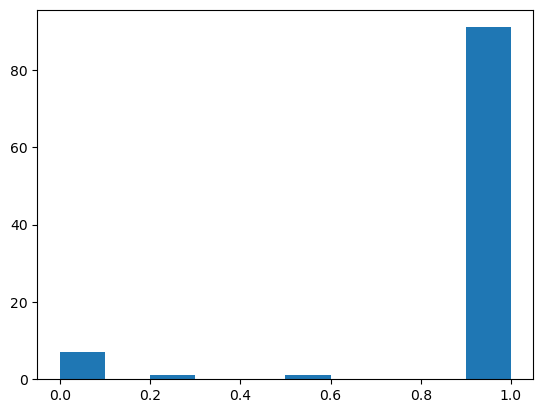

In [74]:
sample_size = 1000
ci_level = 5
true_mean = 1/(6)
#true_mean = np.mean(np.random.beta(1,5,size=100_000))
print(true_mean)

ci_hit_perc = []
    
start = process_time()
for i in np.arange(0,100):
    samp = np.random.beta(1,5,size=sample_size)
    if i%10 == 0:
        print(process_time()-start)
    ci_hit_count = 0
    for k in np.arange(0,1000):
        boot_means = []
        for j in np.arange(0,1000):
            boot_samp = np.random.choice(samp,size = sample_size,replace=True)
            boot_means.append( np.mean(boot_samp) - np.mean(samp))
        
        L0 = np.percentile(boot_means,ci_level/2)
        U0 = np.percentile(boot_means,100-ci_level/2)
        #check if empirical bootstrap contains the true mean
        if np.mean(samp)-U0 < true_mean < np.mean(samp)-L0:
            ci_hit_count+=1
    ci_hit_perc.append(ci_hit_count/1000)
    

print(np.mean(ci_hit_perc))
plt.hist(ci_hit_perc)

In [77]:
sum(np.array(ci_hit_perc) < 0.01)

7

In [78]:
letter_numbers = { "A":9, "B":2, "C":2, "D":4, "E":12, "F":2, "G":3, "H":2, "I":9, \
                  "J":1, "K":1, "L":4, "M":2, "N":6, "O":8, "P":2, "Q":1, "R":6, \
                  "S":4, "T":6, "U":4, "V":2, "W":2, "X":1, "Y":2, "Z":1 }

# Let us check: how many letter tiles are in the box?
def is_valid(word, tile_counts):
    '''a function that checks if a given word can be built using scrabble tiles'''
    word_count_items={item:word.count(item) for item in set(word)}
    return all(tile_counts.get(item.upper(),0) >= count for item, count in word_count_items.items())

In [83]:
is_valid("jaz",letter_numbers)

True

In [85]:
def vowel_count(input_str):
    '''a function that counts the vowels in a string'''
    input_str=input_str.lower()
    vowels='aeiou'
    count=0
    for word in input_str:
        if word in vowels:
            count+=1
    return count
vowel_count("AabcEe e Ii Oo Uu")

11

In [86]:
letter_numbers = { "A":9, "B":2, "C":2, "D":4, "E":12, "F":2, "G":3, "H":2, "I":9, \
                  "J":1, "K":1, "L":4, "M":2, "N":6, "O":8, "P":2, "Q":1, "R":6, \
                  "S":4, "T":6, "U":4, "V":2, "W":2, "X":1, "Y":2, "Z":1 }

def is_valid(word):
    word = word.upper()#converts to uppercase
    for letter in word:
        # If the letter is in the available letters
        if letter in letter_numbers and letter_numbers[letter] > 0:
            # Use one tile
            letter_numbers[letter] -= 1
        else:
            # If the letter is not available
            return False
    return True

In [87]:
is_valid("AAAA")

True

In [88]:
is_valid("AAAA")

True

In [90]:
is_valid("AAAA")

False